**Stat110 Lecture 8**: https://www.youtube.com/watch?v=k2BB0p8byGA&list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo&index=9.
This lecture starts with introduction to Random Variables and goes on to explain Bernoulli and Binomial distributions

**Random Variable**: It is a function that takes as input outcomes in sample space (S) of an experiment and maps it to a real line. It basically provides a handy way to summarize an aspect of an experiment (not the complete experiment)

**X: S ↦ ℜ**

e.g Consider an experiment of tossing a coin. Sample space of the experiment S: {H,T}. Let X be a Random Variable summarizing a trial of this experiment such that X(H) = 1 and X(T) = 0. This is an exampls of X being a Bernoulii Random Variable.

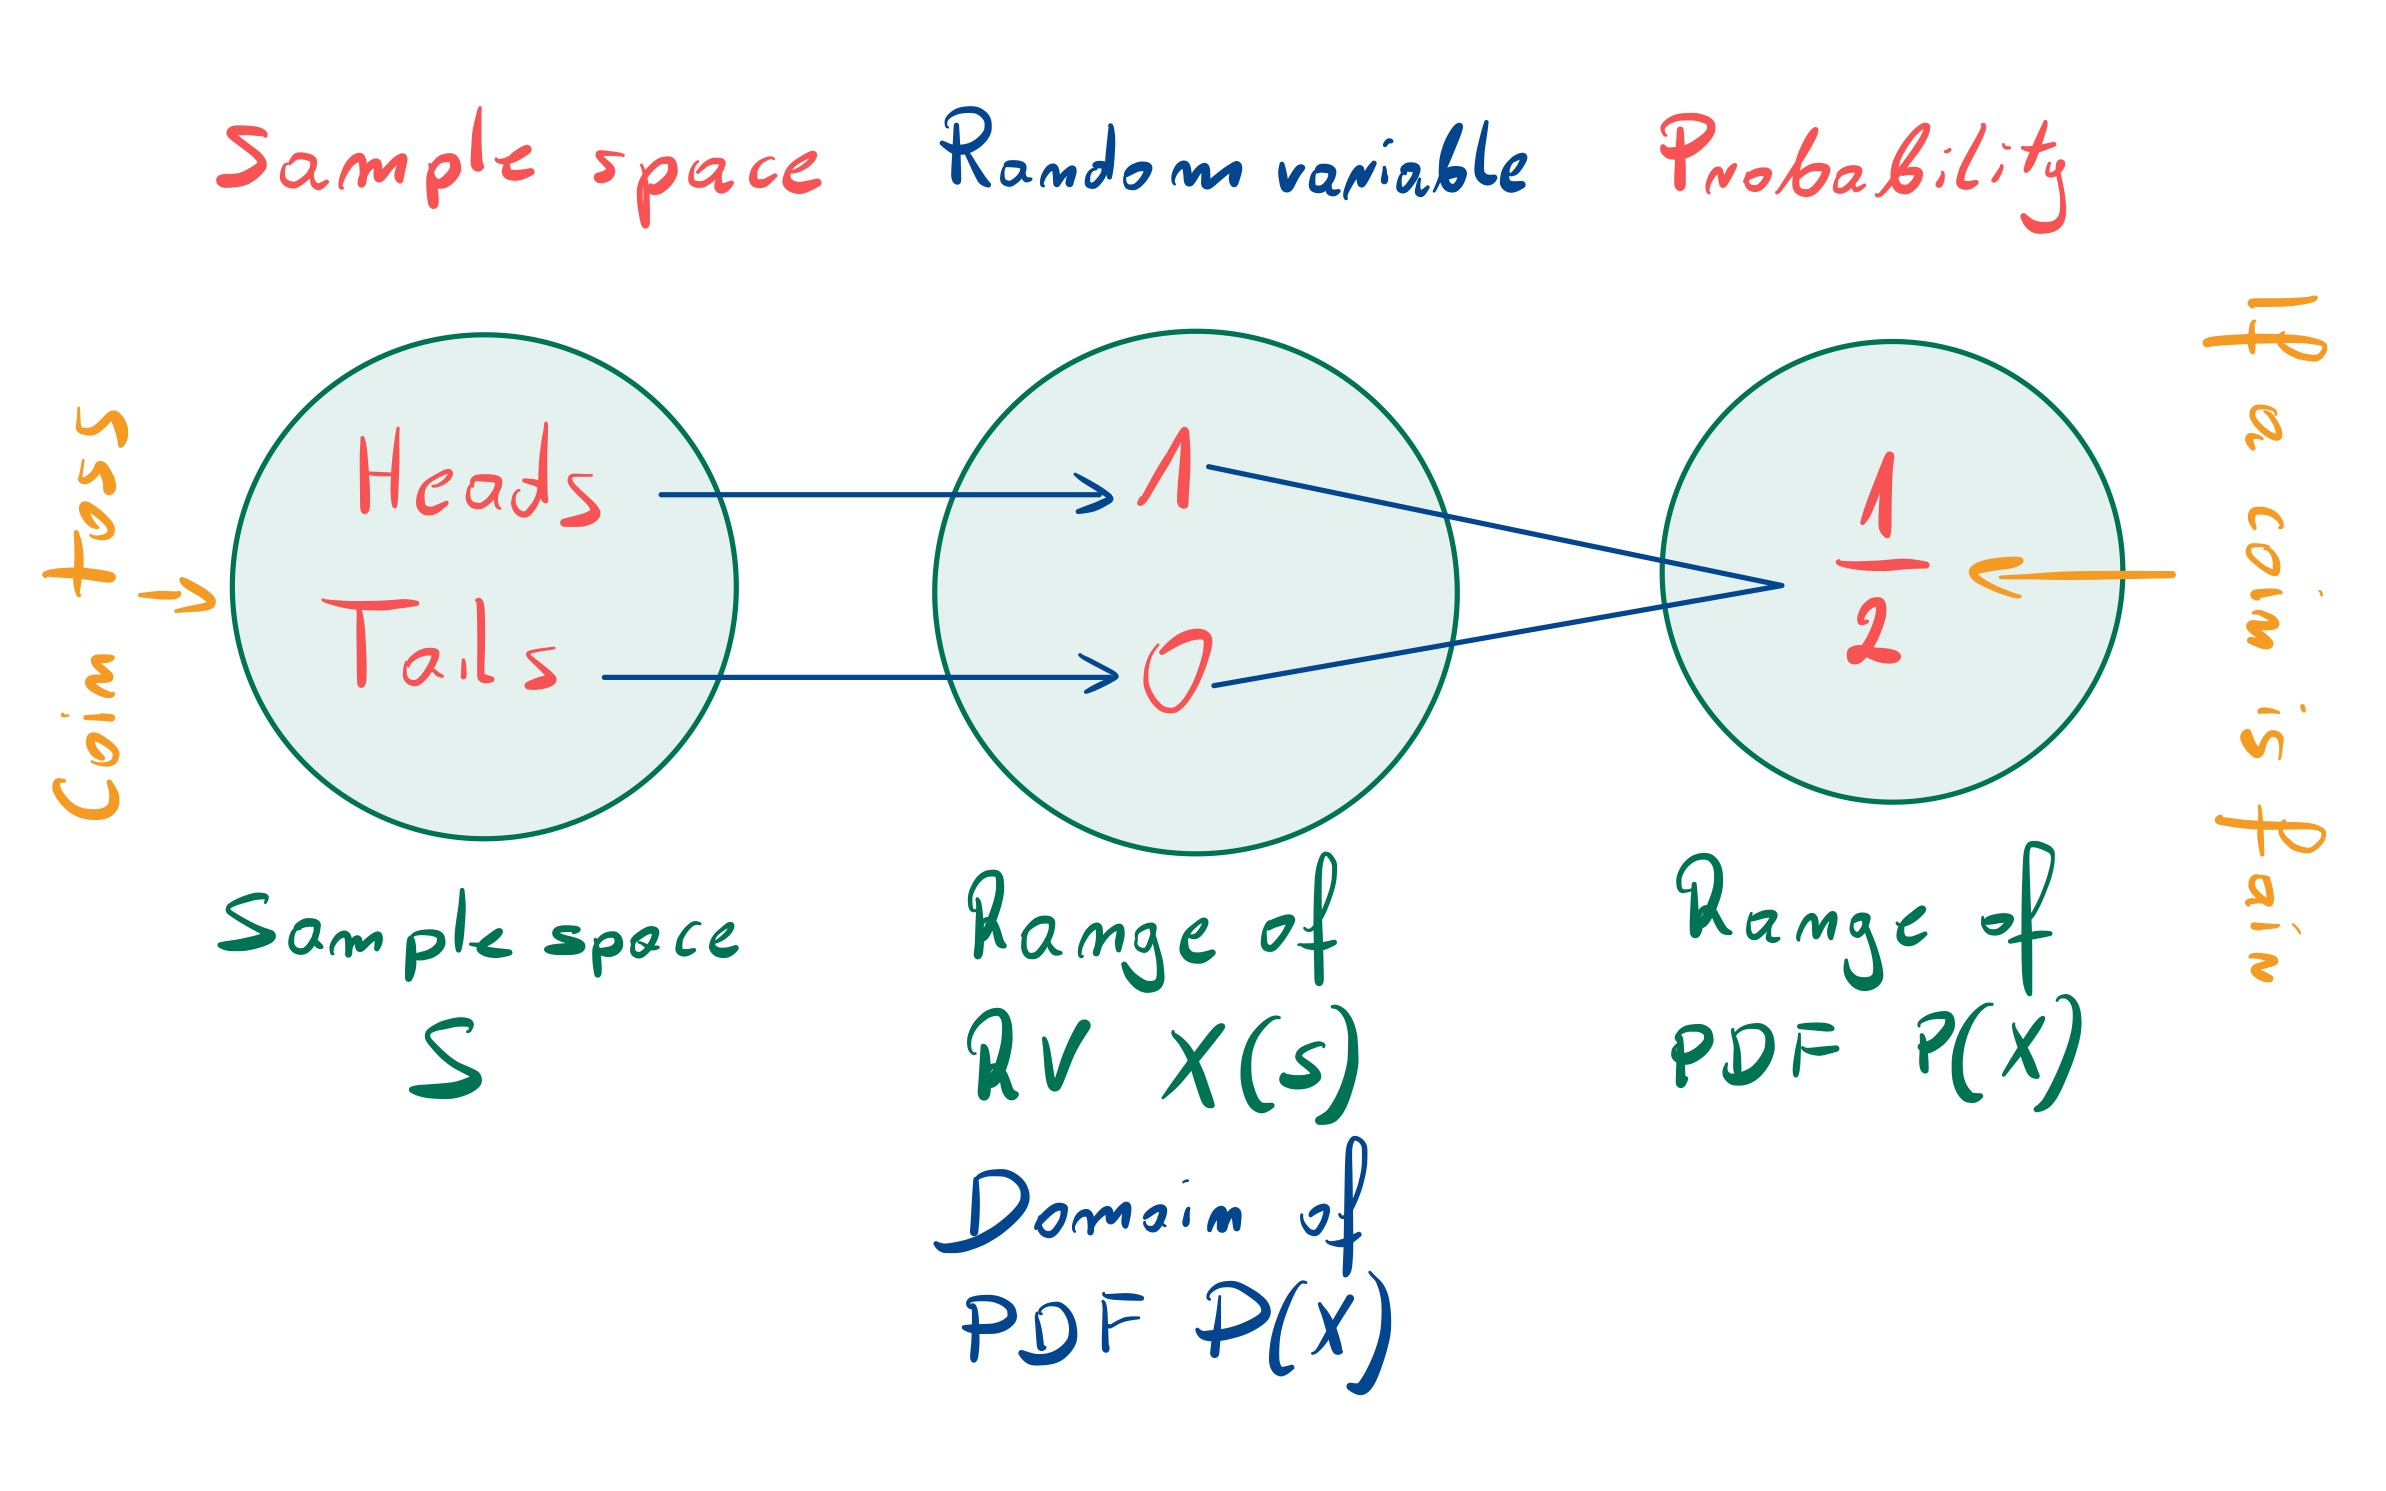


**Types of Random Variables:**


*   **Discrete RV**: These are the random variables whose range is discrete i.e integer values that can be listed (finite countable or infinite countable). For example: Bernoulli (takes values 0,1), Binomial (takes values 0 to n), Poisson etc.
*   **Continuous RV**: Thes are the random variables whose rangeis continuous i.e canot be listed. For example: Exponential distibution can take values from 0 to inf (ℜ$^{+}$)
*   **Mixed RV**



**Bernoulli Random Variable**

X ∼ Bernoulli(p) : A Random Variable X follows Bernoulli distribution if X can take only 2 values, 1 with probability p and 0 with probability 1-p. i.e.
P(X=1) = p and P(X=0) = 1-p. It is a Discrete RV since it only takes integer values that are listable.
e.g. Consider an experiment of tossing a coin. S: {H, T}. Consider RV X following Bernoulli(p) distribution. H maps to 1 and T maps to 0.


*   P(X=1) = P(outcome is Head) = p
*   P(X=0) = P(outcome is Tail) = 1-p

Any experiment whose Sample Space can be mapped to 0 and 1 with probabilities 1-p and p respectively can be summarized using Bernoulli RV.





In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from operator import itemgetter
from collections import Counter, defaultdict

In [2]:
def bernoulli_experiment(head_prob = 0.5, iteration_count = 1000):
  ## This is an experimental description of Bernoulli Random Variable using toss of a single coin
  result_list = []
  for iteration in range(iteration_count):
    result = 'H' if np.random.choice(np.arange(0,1, 0.1), size=1)<head_prob else 'T'
    result_list.append(result)
  prob_dict = {'P(Heads),P(X=1)': result_list.count('H')/iteration_count, 'P(Tails), P(X=0)': result_list.count('T')/iteration_count}
  return prob_dict

In [3]:
p_success = 0.4

In [4]:
## This describes an experiment using a bernoulli RV
coin_toss_result_prob = bernoulli_experiment(head_prob=p_success, iteration_count=1000)
coin_toss_df = pd.DataFrame.from_dict(data = coin_toss_result_prob, orient='index').reset_index().rename(columns={"index":"description", 0: "probability"})
coin_toss_df.loc[:, 'type'] = "experiment"

In [5]:
## This describes a Bernoulli RV using stats library
bernoulli_rv = stats.bernoulli(p_success)
bernoulli_prob = bernoulli_rv.pmf(k=[0,1])
bernoulli_prob_df = pd.DataFrame({"probability":bernoulli_prob, "description": ["P(Tails), P(X=0)", "P(Heads),P(X=1)"], "type":"distribution"})

In [6]:
combined_bernoulli_prob_df = pd.concat([coin_toss_df, bernoulli_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Bernoulli(0.4) distribution')]

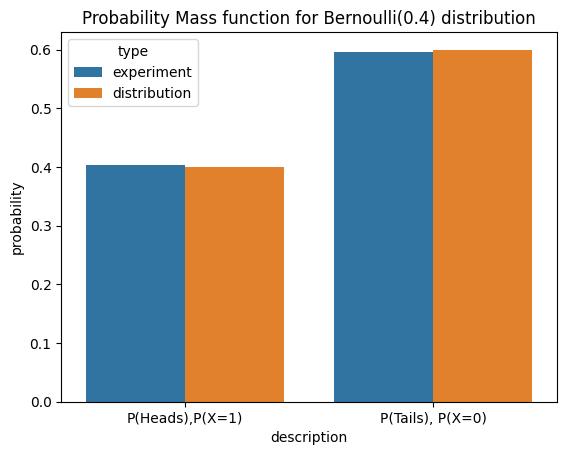

In [7]:
## Plot graph: This shows that coin toss experiment is correctly summarized using Bernoulli(p) RV
sns.barplot(data=combined_bernoulli_prob_df, x="description", y="probability", hue="type").set(title=f"Probability Mass function for Bernoulli({p_success}) distribution")

**Binomial Random Variable**

X ∼ Bin(n,p). The interpretation is as follows:


*   X represents the number of successes in n independent Bernoulli(p) trials.
*   Binomial(n,p) distribution is the distribution of number of successes in n independent Ber(p) trials.
*    P(X=k) = P(# successes=k) = $\binom{n}{k}p^k(1-p)^{n-k}$, 0<=k<=n

e.g. Consider n independent Bernoulli(p) tossing of coins i.e. n times coin is tossed one after the other such that P(head) = p. Then, the P(# heads = k) is modelled by Binomial(n,p) distribution

In [8]:
def binomial_experiment(n, p, n_iter = 1000):
  success_count_list = []
  for iter in range(n_iter):
    ## n tosses
    binomial_trail_result_list = ['H' if np.random.choice(np.arange(0,1, 0.1), size=1)<p else 'T' for i in range(n)]
    result_counter = Counter(binomial_trail_result_list)
    ## Count number of heads/ successed in n tosses
    success_count = result_counter.get('H', 0)
    ## Add # of heads/ successes to success_count_list
    success_count_list.append(success_count)

  success_counter = Counter(success_count_list)
  return_prob = {i: success_counter.get(i, 0)/n_iter for i in range(n+1)}
  return return_prob

In [9]:
n_binomial = 40
p_binomial = 0.8

In [10]:
binomial_experiment_result_prob = binomial_experiment(n_binomial, p_binomial, n_iter = 1000)
binomial_experiment_df = pd.DataFrame.from_dict(data = binomial_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X=k)"})
binomial_experiment_df.loc[:, 'type'] = "experiment"

In [11]:
binomial_rv = stats.binom(n_binomial, p_binomial)
binomial_prob = binomial_rv.pmf(k=[i for i in range(n_binomial+1)])
binomial_prob_df = pd.DataFrame({"P(X=k)":binomial_prob, "k": [i for i in range(n_binomial+1)], "type":"distribution"})

In [12]:
combined_binomial_prob_df = pd.concat([binomial_experiment_df, binomial_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Binomial(40, 0.8) distribution')]

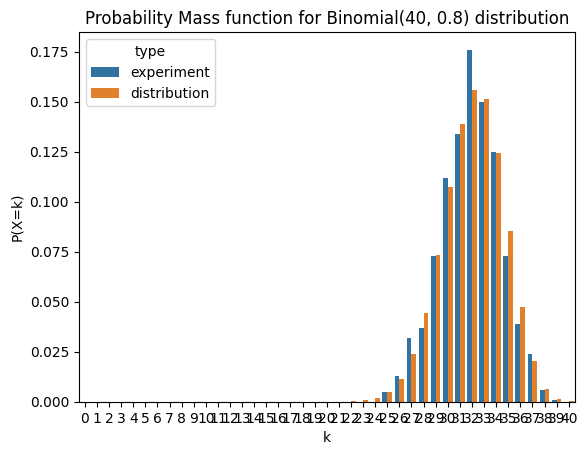

In [13]:
sns.barplot(data=combined_binomial_prob_df, x="k", y="P(X=k)", hue="type").set(title=f"Probability Mass function for Binomial({n_binomial}, {p_binomial}) distribution")

Binomial distribution as an urn problem:

Let there be an urn with r red and g green balls. Let there be n trials of drawing balls from this urn with replacement. Taking out green ball is considered as success and red as failure. The number of green (success) balls taken out in n trials follows Binomial(n, g/r+g) distribution.

In [14]:
def binomial_experiment_urn(r, g, n, n_iter=1000):
  success_counter = defaultdict(int)
  for i in range(n_iter):
    ## Step 1: create an urn with r+g balls and shuffle it in place
    urn_list = ['R']*r + ['G']*g
    random.shuffle(urn_list)

    ## Step2: Sample ball from urn for n trials
    binomial_trial_result_list = [random.choice(urn_list) for i in range(n)]

    ## Step3: Count number of successes (green balls)
    result_counter = Counter(binomial_trial_result_list)
    success_count = result_counter.get('G', 0)
    success_counter[success_count] = success_counter[success_count]+1

  #return_prob = {success_count: success_count/iter_count for success_count, iter_count in success_counter.items()}
  return_prob = {i: success_counter.get(i, 0)/n_iter for i in range(n+1)}
  return return_prob

In [15]:
n_red = 10
n_green = 10
n_trials = 15
binomial_urn_experiment_result_prob = binomial_experiment_urn(n_red, n_green, n_trials, n_iter=1000)
binomial_experiment_urn_df = pd.DataFrame.from_dict(data = binomial_urn_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X=k)"})
binomial_experiment_urn_df.loc[:, 'type'] = "experiment"

In [16]:
binomial_urn_rv = stats.binom(n_trials, n_green/(n_green+n_red))
binomial_urn_prob = binomial_urn_rv.pmf(k=[i for i in range(n_trials+1)])
binomial_urn_prob_df = pd.DataFrame({"P(X=k)":binomial_urn_prob, "k": [i for i in range(n_trials+1)], "type":"distribution"})

In [17]:
combined_binomial_urn_prob_df = pd.concat([binomial_experiment_urn_df, binomial_urn_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Binomial(15, 0.5) distribution')]

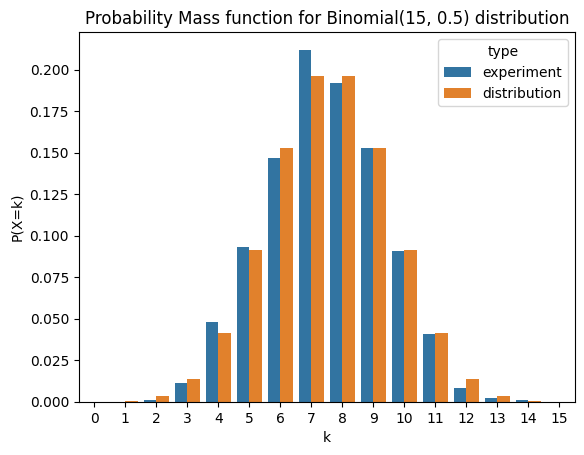

In [18]:
sns.barplot(data=combined_binomial_urn_prob_df, x="k", y="P(X=k)", hue="type").set(title=f"Probability Mass function for Binomial({n_trials}, {n_green/(n_green+n_red)}) distribution")

**Add 2 DISCRETE Random Variables (Convolution operartion):**
Link: https://chrispiech.github.io/probabilityForComputerScientists/en/part4/summation_vars/

Let Z = X +Y be a Random Variable that is obtained by adding 2 Random Variables X and Y. This means we can calulate P(X+Y=n)

**Why is it called convolution?**

This is called convolution because adding random variables involves convolving their respective distirbution functions(PMF, PDF). Importantly convolution is the sum of the random variables themselves, not the addition of the probability density functions (PDF)s that correspond to the random variables. The convolution operation is as follows:

P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i, Y=n-i)$. -> **(1)** <br>
**X+Y=n** event can be understood as combination of disjoint events where X=i and Y=n-i so as to attain value such that X+Y=n. <br/>
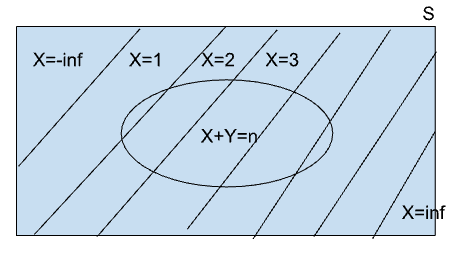


Derivation of equation **(1)** <br/>
P(X+Y=n) = P(X+Y=n, X=-inf)+...+ P(X+Y=n, X=0) + P(X+Y=n, X=1) + .... + P(X+Y=n, X=n) + .... + P(X+Y=n, X=inf) <br/>
P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i, X+Y=n)$ <br/>
Using Baye's theorem: P(AB) = P(A|B)P(B) <br/>

P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X+Y=n|X=i)P(X=i)$ = $\sum_{i=-∞}^{i=+∞}P(Y=n-i|X=i)P(X=i)$ = $\sum_{i=-∞}^{i=+∞}P(X=i, Y=n-i)$ <br/>

If X and Y are independent RVs then, P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i)P(Y=n-i)$ <br/>

For more details refer to:


*   https://stats.stackexchange.com/questions/95993/can-anyone-clarify-the-concept-of-a-sum-of-random-variables: Answer by Daniel Li
*   https://chrispiech.github.io/probabilityForComputerScientists/en/part4/summation_vars/



**Addition of 2 independent Binomial Random Variables**

In [19]:
## The RV in this experiment are independent by thye vvirtue of the way experiment is structured. n1 tosses are conducted and then n2 are conducted independently
def add_two_independent_binomial_variables(n1, p1, n2, p2, n_iter = 1000):
  sum_trial_count_dict = defaultdict(int) ## {total_success: trial_count}
  for i in range(n_iter):
    ## Perform n_iter trials in total
    ## Step 1: Observe Binomial X(n1, p1). Will give list of H, T of length n1
    binomial_X_result_list = ['H' if np.random.choice(np.arange(0,1, 0.1), size=1)<p1 else 'T' for i in range(n1)]
    ## Step 1.1 Get counts of heads and tails received in this binomial trial
    counter_X = Counter(binomial_X_result_list)
    ## Step 1.2 Get number of heads/ successes in this binomial trial
    success_X_count = counter_X.get('H',0)

    ## Step 2: Observe Binomial Y(n2, p2)
    binomial_Y_result_list = ['H' if np.random.choice(np.arange(0,1, 0.1), size=1)<p2 else 'T' for i in range(n2)]
    ## Step 2.1 Get counts of heads and tails in this trial
    counter_Y = Counter(binomial_Y_result_list)
    ## Step 2.2 Get number of heads/ successes in this trial
    success_Y_count = counter_Y.get('H', 0)

    success_x_plus_y = success_X_count + success_Y_count

    ## Update sum_trial_count_dict
    sum_trial_count_dict[success_x_plus_y] = sum_trial_count_dict[success_x_plus_y]+1

  return_prob = {k: related_trial_count/n_iter for k, related_trial_count in sum_trial_count_dict.items()}
  return return_prob

In [20]:
n_binom1 = 30
n_binom2 = 20
p_binom1 = 0.7
p_binom2 = p_binom1

In [21]:
add_binomial_experiment_result_prob = add_two_independent_binomial_variables(n_binom1, p_binom1, n_binom2, p_binom2, n_iter = 1000)
add_binomial_experiment_df = pd.DataFrame.from_dict(data = add_binomial_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X+Y=k)"})
add_binomial_experiment_df.loc[:, 'type'] = "experiment"

In [22]:
add_binomial_rv = stats.binom(n_binom1+n_binom2, p_binom1)
add_binomial_prob = add_binomial_rv.pmf(k=[i for i in range(n_binom1+n_binom2+1)])
add_binomial_prob_df = pd.DataFrame({"P(X+Y=k)":add_binomial_prob, "k": [i for i in range(n_binom1+n_binom2+1)], "type":"distribution"})

In [23]:
combined_add_binomial_prob_df = pd.concat([add_binomial_experiment_df, add_binomial_prob_df], axis=0)

<Axes: xlabel='k', ylabel='P(X+Y=k)'>

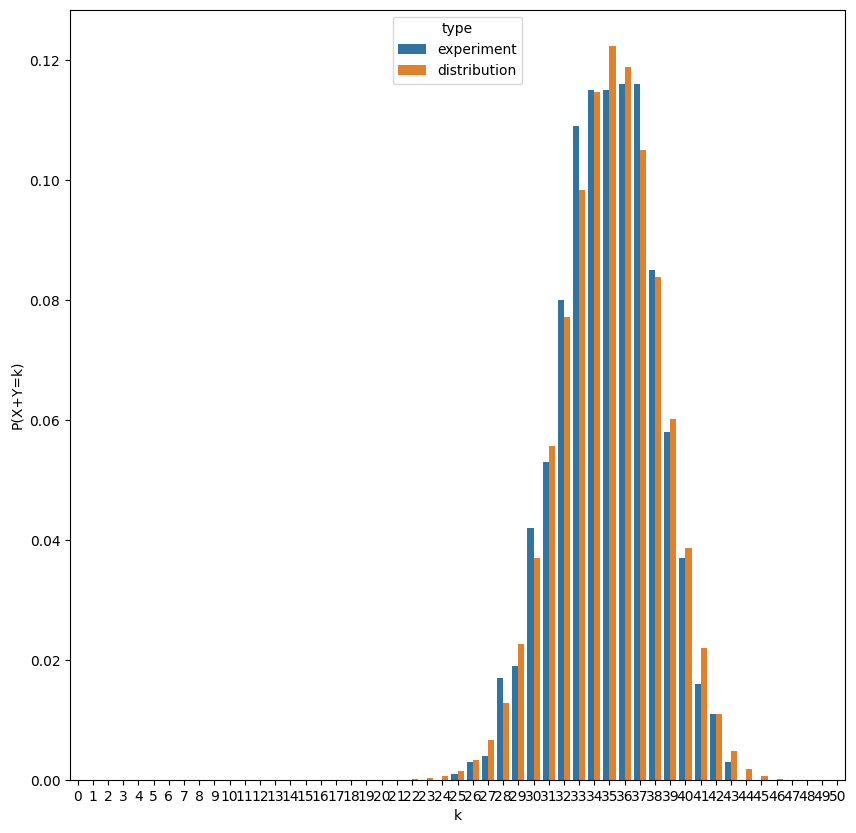

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=combined_add_binomial_prob_df, x="k", y="P(X+Y=k)", hue="type", ax=ax)#.set(title=f"Probability Mass function for Binomial({n_binomial}, {p_binomial}) distribution")

**Addition of 2 independent Uniform Random Variables**

X ~ Uniform({a,b}) <br/>
Y ~ Uniform({a,b})

Z = X+Y is also a random variable which follows triangular distribution. <br/>

P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i, Y=n-i)$
Considering X and Y are independent variables, P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i).P(Y=n-i)$ = $\sum_{i=a}^{i=n-a}P(X=i).P(Y=n-i)$ = $\sum_{i=a}^{i=n-a}1/(b-a+1)^{2}$ = $(n-2a+1)/(b-a+1)^{2}$ <br/>

Under case when X summarizes a dice roll and Y also summarizes a dice roll with each side equally likely. P(X+Y=n) = (n-1)/36 only when 2<=n<=7

In [25]:
class discrete_uniform:
  def __init__(self, lower_input, upper_input):
    self.lower_input = lower_input
    self.upper_input = upper_input

  def pmf(self, k):
    return 1/(self.upper_input-self.lower_input+1)


In [26]:
## EXPERIMENT of throwing fair dice
def add_two_uniform_random_variables(uniform_rv_list, n_iter = 1000):
  sum_trial_count_dict = defaultdict(int)
  for i in range(n_iter):
    roll1 = np.random.choice([1,2,3,4,5,6], size=1)[0] ## each outcome eually likely = 1/6
    roll2 = np.random.choice([1,2,3,4,5,6], size=1)[0]

    sum_rolls = roll1+roll2
    sum_trial_count_dict[sum_rolls] = sum_trial_count_dict[sum_rolls]+1

  min_sum = sum([rv.lower_input for rv in uniform_rv_list])
  max_sum = sum([rv.upper_input for rv in uniform_rv_list])

  return_prob = {s:sum_trial_count_dict.get(s, 0)/n_iter for s in range(min_sum, max_sum+1, 1)}
  return return_prob

In [27]:
lower1 = 1
upper1 = 6
lower2 = 1
upper2 = 6
uniform1= discrete_uniform(lower1, upper1)
uniform2 = discrete_uniform(lower2, upper2)

In [28]:
add_uniform_experiment_result_prob = add_two_uniform_random_variables([uniform1, uniform2], n_iter = 2000)
add_uniform_experiment_df = pd.DataFrame.from_dict(data = add_uniform_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X+Y=k)"})
add_uniform_experiment_df.loc[:, 'type'] = "experiment"

In [29]:
## Create a custom discrete RV where PMF is calculated using definition of convolution defined above
class sum_independent_uniform_rv(stats.rv_discrete):
  def __init__(self, uniform1, uniform2):
    self.a1 = uniform1.lower_input
    self.b1 = uniform1.upper_input
    self.a2 = uniform2.lower_input
    self.b2 = uniform2.upper_input

  def pmf(self, k):
    return_prob_list = []
    for k_val in k:
      valid_tuple_count = 0
      for x in range(self.a1, self.b1+1):
        y = k_val-x
        ## ensure if y is meaningful value
        if y>=self.a2 and y<=self.b2:
          valid_tuple_count = valid_tuple_count+1

      prob = valid_tuple_count/((self.b1-self.a1+1)*(self.b2-self.a2+1))
      return_prob_list.append(prob)

    return return_prob_list

In [30]:
add_uniform_rv = sum_independent_uniform_rv(uniform1, uniform2)
min_sum = add_uniform_rv.a1 + add_uniform_rv.a2
max_sum = add_uniform_rv.b1 + add_uniform_rv.b2
add_uniform_prob = add_uniform_rv.pmf(k=[i for i in range(min_sum, max_sum+1, 1)])
add_uniform_prob_df = pd.DataFrame({"P(X+Y=k)":add_uniform_prob, "k": [i for i in range(min_sum, max_sum+1, 1)], "type":"distribution"})

In [31]:
combined_add_uniform_prob_df = pd.concat([add_uniform_experiment_df, add_uniform_prob_df], axis=0)

<Axes: xlabel='k', ylabel='P(X+Y=k)'>

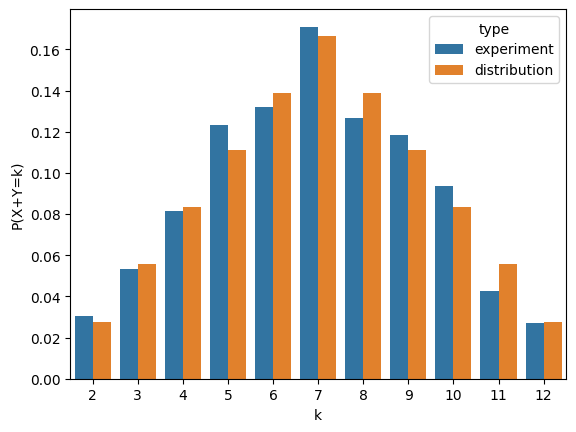

In [32]:
sns.barplot(data=combined_add_uniform_prob_df, x="k", y="P(X+Y=k)", hue="type")#.set(title=f"Probability Mass function for Binomial({n_binomial}, {p_binomial}) distribution")

**Hypergeometric distribution**<br/>
It is a discrete distribution that describes the distribution of number of successes in a draw of **n** items from a population of **N** items such that drawing of **K** items constitute success => **N-K** items, if drawn, constitutes failure. The draws are done WITHOUT REPLACEMENT

X ~ Hyper(N, K, n) where <br/>
N: Population size <br/>
K: Number of success states in the population (Drawing them is considered a success) <br/>
n: Sample size that is drawn <br/>

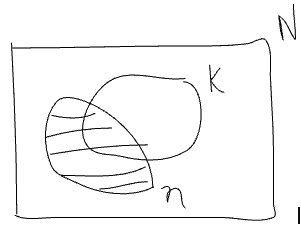

P(X=k) = $p_{X}(k)$ = $\binom{K}{k}\binom{N-K}{n-k}/\binom{N}{n}$ where k is the number of successes, defined for 0<=k<=K. <br/>

**Note**: If the draws are done WITH REPLACEMENT, then X will follow Binomial distribution as each draw will be independent Bernoulli(p=K/N). Hence X ~ Binom(n, K/N)

In [ ]:
# class Card:
#   def __init__(self, value, suit):
#     self.value = value
#     self.suit = suit

#     if self.suit in ['hearts', 'diamonds']:
#       self.color = 'R'
#     else:
#       self.color = 'B'

# value_list = [val for val in range(2,11)] + ["K","Q","J","A"]
# suit_list = ["spades", "hearts", "clubs", "diamonds"]

In [33]:
def hypergeometric_experiment(population_size, success_size, sample_data_size, n_iter=1000):
  success_trial_count_dict = defaultdict(int)
  for i in range(n_iter):
    ## Get a standard deck of cards
    # deck = [Card(value, suit) for value in value_list for suit in suit_list]
    # random.shuffle(deck)
    deck = ['S']*success_size + ['F']*(population_size-success_size)
    random.shuffle(deck)

    ## randomly draw sample_data_size cards from it without replacement (VERY IMPORTANT)
    sample_list = random.sample(deck, sample_data_size)

    ## Count number of aces received:
    success_count = sum([1 if val == 'S' else 0 for val in sample_list])
    success_trial_count_dict[success_count]+=1

  ##
  return_prob = {s:success_trial_count_dict.get(s, 0)/n_iter for s in range(0, sample_data_size+1)}
  return return_prob

In [34]:
sample_data_size = 20
population_size = 100
success_population_size = 15

In [35]:
hypergeometric_experiment_result_prob = hypergeometric_experiment(population_size=population_size, success_size=success_population_size, sample_data_size=sample_data_size, n_iter = 1000)
hypergeometric_experiment_df = pd.DataFrame.from_dict(data = hypergeometric_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X=k)"})
hypergeometric_experiment_df.loc[:, 'type'] = "experiment"

In [36]:
hypergeometric_rv = stats.hypergeom(M=population_size, n=success_population_size, N=sample_data_size)
hypergeometric_prob = hypergeometric_rv.pmf(k=[i for i in range(0, sample_data_size+1)])
hypergeometric_prob_df = pd.DataFrame({"P(X=k)":hypergeometric_prob, "k": [i for i in range(0, sample_data_size+1)], "type":"distribution"})

In [37]:
combined_hypergeometric_prob_df = pd.concat([hypergeometric_experiment_df, hypergeometric_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Hypergeometric(100, 15, 20) distribution')]

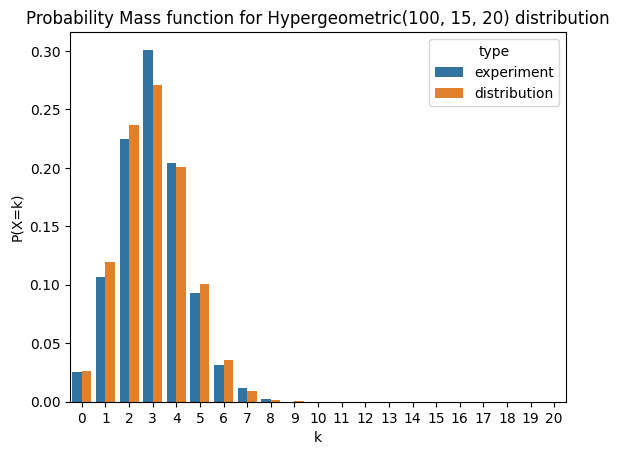

In [38]:
#fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=combined_hypergeometric_prob_df, x="k", y="P(X=k)", hue="type").set(title=f"Probability Mass function for Hypergeometric({population_size}, {success_population_size}, {sample_data_size}) distribution")

An equivalent interpretation of Hypergeometric distribution is as follows: <br>
X ~ Hyper(N, K, n) <br/>
P(X=k) is the distribution of number of successful items k in a sample of size n such that all successful items (K) are drawn in 2 steps:


1.   A sample of size n is drawn that has k success items
2.   Remaning N-n items have the remaning K-k success items <br/>

P(X=k) = $\binom{n}{k}\binom{N-n}{K-k}/\binom{N}{K}$ <br/> This implies that Hypergeometric distribution is symmetric in K and n.

In [39]:
def alternate_hypergeometric_experiment(N, K, n, n_iter = 1000):
  success_trial_count_dict = defaultdict(int)
  for i in range(n_iter):
    ## Step1: Create a population
    population = ['S']*n + ['F']*(N-n)
    random.shuffle(population)

    ## Step 2: Take a sample of K items
    sample_list = random.sample(population, K)

    ## Step 3: Count number of aces received:
    success_count = sum([1 if val == 'S' else 0 for val in sample_list])
    success_trial_count_dict[success_count]+=1

  return_prob = {s:success_trial_count_dict.get(s, 0)/n_iter for s in range(0, sample_data_size+1)}
  return return_prob

In [40]:
alt_hypergeometric_experiment_result_prob = alternate_hypergeometric_experiment(N=population_size, K=success_population_size, n=sample_data_size, n_iter = 1000)
alt_hypergeometric_experiment_df = pd.DataFrame.from_dict(data = alt_hypergeometric_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X=k)"})
alt_hypergeometric_experiment_df.loc[:, 'type'] = "experiment"

In [41]:
alt_hypergeometric_rv = stats.hypergeom(M=population_size, n=success_population_size, N=sample_data_size)
alt_hypergeometric_prob = alt_hypergeometric_rv.pmf(k=[i for i in range(0, sample_data_size+1)])
alt_hypergeometric_prob_df = pd.DataFrame({"P(X=k)":alt_hypergeometric_prob, "k": [i for i in range(0, sample_data_size+1)], "type":"distribution"})

In [42]:
alt_combined_hypergeometric_prob_df = pd.concat([alt_hypergeometric_experiment_df, alt_hypergeometric_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Hypergeometric(100, 15, 20) distribution')]

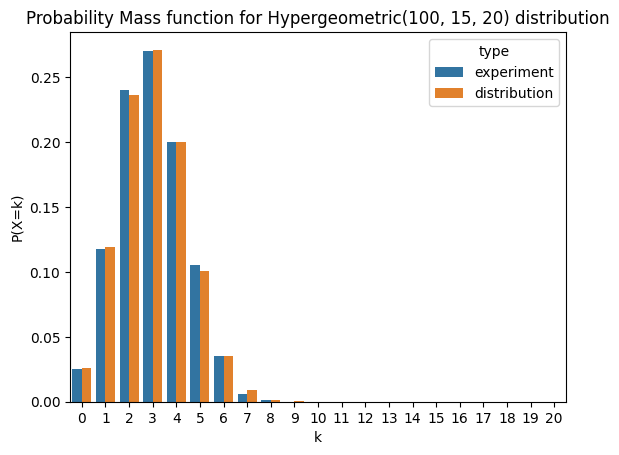

In [43]:
sns.barplot(data=alt_combined_hypergeometric_prob_df, x="k", y="P(X=k)", hue="type").set(title=f"Probability Mass function for Hypergeometric({population_size}, {success_population_size}, {sample_data_size}) distribution")

This shows that hypergeometroc distribution is symmetric in n and K. This means: <br/>
P(X=k) = $\binom{n}{k}\binom{N-n}{K-k}/\binom{N}{K}$ =  $\binom{K}{k}\binom{N-K}{n-k}/\binom{N}{n}$. Interchange n and K


In [44]:
# class Ball:
#   def __init__(self, color):
#     self.color = color

In [45]:
## https://en.wikipedia.org/wiki/Hypergeometric_distribution
# def alternate_hypergeometric_experiment(population_size, success_population_size, sample_size, n_iter=1000):
#   success_trial_count_dict = defaultdict(int)
#   for i in range(n_iter):
#     ## Get ball universe
#     ball_universe_list = [Ball('neutral') for _ in range(population_size)]

#     ## Take a sample of K balls and color them green
#     K_random_choice_index_list = np.random.choice([i for i in range(population_size)], size=success_population_size)
#     for index in K_random_choice_index_list:
#       ball_at_index = ball_universe_list[index]
#       ball_at_index.color = 'green'
#       ball_universe_list[index] = ball_at_index

#     ## Take a sample of size sample_size and color them Red
#     n_random_choice_index_list = np.random.choice([i for i in range(population_size)], size=sample_size)
#     for index in n_random_choice_index_list:
#       ball_at_index = ball_universe_list[index]
#       ball_at_index.color = 'red' if ball_at_index.color == 'neutral' else 'green+red'
#       ball_universe_list[index] = ball_at_index

#     ## Get count of balles with green+red color
#     color_list = [ball.color for ball in ball_universe_list]
#     k = Counter(color_list).get('green+red', 0)
#     success_trial_count_dict[k]+=1

#   return_prob = {s:success_trial_count_dict.get(s, 0)/n_iter for s in range(0, sample_size+1)}
#   return return_prob

In [46]:
# alternate_hypergeometric_experiment(population_size=population_size, success_population_size=success_population_size, sample_size=sample_data_size, n_iter = 1000)

**Negative Hypergeometric distribution**<br/>
X follows Neg Hyper distribution if X is the number of success examples in a sample drawn such that the sample has exactly r fails from the population of size N with K success examples.

Note: The difference in Hypergeometric and Negative Hypergeometric is that Hypergeometric DIRECTLY defines the sample size n that is drawn from the population whereas Neg Hypergeometric defines the sample size INDIRECTLY in the sense of keeping on drawing till the sample has exactly r fail items in it.

X ~ Neg-Hyper(N, K, r) where <br/>
1. N: Population size
2. K: Number of +ve/ success examples in Population
3. r: Number of fail examples

e.g. Consider an urn with K green balls(+ve/success) and N-K red balls(-ve/fail). Now, keep on drawing balls from this urn till you have drawn exactly r red balls(fails). X is then the number of green(+ve/success) balls in the sample that has been drawn.

P(X=k) = P(k succcesses in a sample with exactly r failures)<br/>
= P(A, B) , where A=r-1 failures in k+r-1 draws AND B=rth failure in (k+r)th draw) <br/>
= P(B|A)*P(A) <br/>

P(B|A) = P(rth failure in (k+r)th draw | r-1 failures in k+(r-1)) = N-K-(r-1)/(N-(k+r-1)) <br/>

P(A) = P(r-1 failures in k+r-1 draws) = Hyper(k; N, K, k+r-1) = $\binom{K}{k}\binom{N-K}{r-1}/\binom{N}{k+r-1}$ <br/>

P(X=k) = P(A,B) = P(B|A)P(A) = $\frac{N-K-(r-1)}{(N-(k+r-1))} * \frac{\binom{K}{k}\binom{N-K}{r-1}}{\binom{N}{k+r-1}}$




In [47]:
def negative_hypergeometric_distribution_experiment(N, K, r, n_iter=1000):
  success_trial_count_counter = defaultdict(int)

  for i in range(n_iter):
    ## Step 1: Create an urn of K green and N-K red balls
    urn = ['G']*K + ['R']*(N-K)
    random.shuffle(urn)

    ## Step 2: Keep on drawing items from the urn till you have exactly r red balls/ failures
    sample_list = []
    red_counter = 0
    green_counter = 0
    while red_counter <  r:
      res = urn.pop(random.randrange(len(urn)))
      if res == 'R':
        red_counter+=1
      else:
        green_counter+=1
    ##green_counter is the number of success items in the sample with exactly r red items.

    ## Step 3: Update success_trial_counter
    success_trial_count_counter[green_counter]+=1

  return_prob = {s:success_trial_count_counter.get(s, 0)/n_iter for s in range(0, K+1)}
  return return_prob

In [48]:
N_neg_hyp = 20
K_neg_hyp = 7
r_neg_hyp = 12

In [49]:
neg_hypergeometric_experiment_result_prob = negative_hypergeometric_distribution_experiment(N=N_neg_hyp, K=K_neg_hyp, r=r_neg_hyp, n_iter = 1000)
neg_hypergeometric_experiment_df = pd.DataFrame.from_dict(data = neg_hypergeometric_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X=k)"})
neg_hypergeometric_experiment_df.loc[:, 'type'] = "experiment"

In [51]:
neg_hypergeometric_rv = stats.nhypergeom(M = N_neg_hyp, n = K_neg_hyp, r = r_neg_hyp)
neg_hypergeometric_prob = neg_hypergeometric_rv.pmf(k=[i for i in range(0, K_neg_hyp+1)])
neg_hypergeometric_prob_df = pd.DataFrame({"P(X=k)":neg_hypergeometric_prob, "k": [i for i in range(0, K_neg_hyp+1)], "type":"distribution"})

In [52]:
combined_neg_hypergeometric_prob_df = pd.concat([neg_hypergeometric_experiment_df, neg_hypergeometric_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Neg Hypergeometric(20, 7, 12) distribution')]

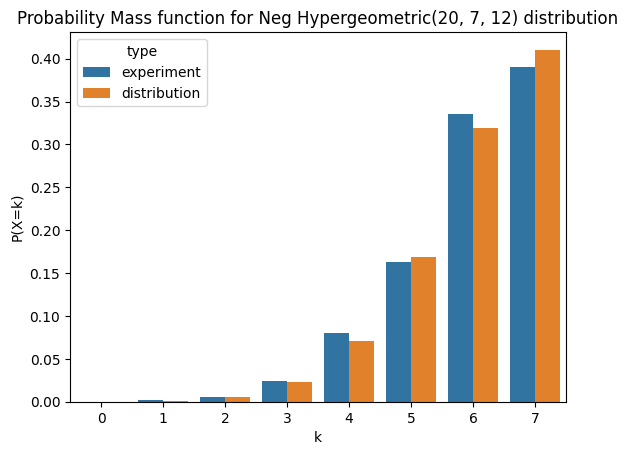

In [53]:
sns.barplot(data=combined_neg_hypergeometric_prob_df, x="k", y="P(X=k)", hue="type").set(title=f"Probability Mass function for Neg Hypergeometric({N_neg_hyp}, {K_neg_hyp}, {r_neg_hyp}) distribution")

**Geometric distribution**
X ~ Geom(p) <br/>
X is the number of failures before getting the 1st success in independent Bernoulli(p) trials <br/>

P(X=k) = P(getting k failures before the 1st success) = P(k failures in k independent Ber(p) trials, Success in k+1 th Ber(p) trial) <br/>
**P(X=k)** = P(Success in k+1 th Ber(p) trial | k failures in k independent Ber(p) trials) * P(k failures in k independent Ber(p) trials) = $p(1-p)^{k}$

In [54]:
def geometric_distribution_experiment(p_success, n_iter=1000):
  failure_iteration_count_dict = defaultdict(int)
  for i in range(n_iter):
    is_failure = True
    failure_count = 0
    while is_failure:
      result = 'H' if np.random.choice(np.arange(0,1, 0.1), size=1)<p_success else 'T'
      if result == 'H':
        is_failure = False
      else:
        failure_count +=1
    failure_iteration_count_dict[failure_count]+=1

  return_prob = {k:iter_count/n_iter for k, iter_count in failure_iteration_count_dict.items()}
  return return_prob

In [89]:
p_success=0.3

In [90]:
geometric_experiment_result_prob = geometric_distribution_experiment(p_success, n_iter = 1000)
geometric_experiment_df = pd.DataFrame.from_dict(data = geometric_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X=k)"})
geometric_experiment_df.loc[:, 'type'] = "experiment"
geometric_experiment_df = geometric_experiment_df.sort_values(by=['k'], ascending=True)

In [91]:
##stats.geom is defined as total number of trials wherer there are k-1 failures and kth success. This is shifted by 1
geometric_rv = stats.geom(p_success)
geometric_prob = geometric_rv.pmf(k=[i for i in range(0, geometric_experiment_df['k'].max()+1)])
geometric_prob_df = pd.DataFrame({"P(X=k)":geometric_prob, "k": [i-1 for i in range(0, geometric_experiment_df['k'].max()+1)], "type":"distribution"})
geometric_prob_df = geometric_prob_df.sort_values(by=['k'], ascending=True)

In [92]:
combined_geometric_prob_df = pd.concat([geometric_experiment_df, geometric_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Geometric(0.3) distribution')]

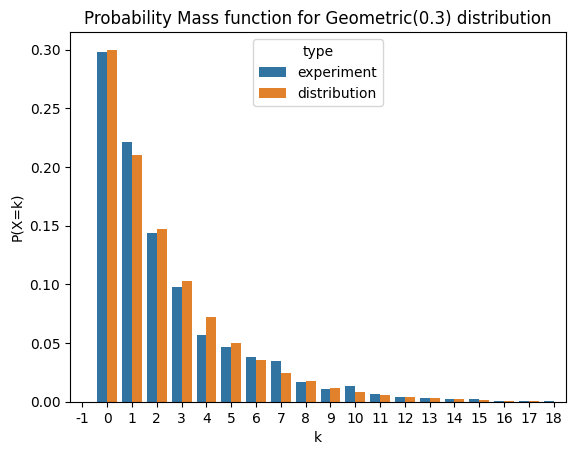

In [93]:
sns.barplot(data=combined_geometric_prob_df, x="k", y="P(X=k)", hue="type").set(title=f"Probability Mass function for Geometric({p_success}) distribution")